In [3]:
import pandas as pd


In [124]:
df = pd.read_json("csvjson.json")

In [125]:
df.head()

,id,tweet_id,text,created_at,iso_language_code,result_type,favorite_count,retweet_count,location,user_id,user_location,user_name,user_screen_name,user_friends_count,user_followers_count,user_statuses_count,user_created_at
0,1,1229783360089686016,#day14 unpack and pack again. No more unpack u...,2020-02-18 15:02:55,en,recent,22,0,Hong Kong,104099417,hong kong,Yardley Wong,yardley_wong,403,4573.0,2635.0,2010-01-12 07:31:27
1,2,1229760294387404800,RT @well_allan: Demand of private jets is boom...,2020-02-18 13:31:16,en,recent,0,1,Hong Kong,1099841956031676416,"Florida, USA",Qmy Dee 😷🌱🌏,Cumi_Mark5_41,1174,810.0,3849.0,2019-02-25 01:22:11
2,3,1229744276814225408,#day14 #coronavirus #COVD19 I need to primp my...,2020-02-18 12:27:37,en,recent,86,3,Hong Kong,104099417,hong kong,Yardley Wong,yardley_wong,403,4573.0,2635.0,2010-01-12 07:31:27
3,4,1229742972054491136,RT @hkerdede: @nytimes Senator Tom Cotton just...,2020-02-18 12:22:26,en,recent,0,2,Hong Kong,1165817164718399488,,ElenaHR😷,zilbellaEchi,476,715.0,28622.0,2019-08-26 02:45:52
4,5,1229721576406306816,#day14 #coronavirus #COVID19 disembarked at 10...,2020-02-18 10:57:25,en,recent,157,2,Hong Kong,104099417,hong kong,Yardley Wong,yardley_wong,403,4573.0,2635.0,2010-01-12 07:31:27


In [11]:
# ! pip install twitter matplotlib PrettyTable

In [15]:
# pip install pymysql

In [126]:
#this function shows queried results of our twitter dataset e.g. "Singapore"
def match_text(query):
    results = df[df['text'].str.contains(query)]
    return results 


In [127]:
match_text("Singapore")

,id,tweet_id,text,created_at,iso_language_code,result_type,favorite_count,retweet_count,location,user_id,user_location,user_name,user_screen_name,user_friends_count,user_followers_count,user_statuses_count,user_created_at
124,125,1228313964708323328,RT @JackKSoh: An anaesthesiologist is Singapor...,2020-02-14 13:44:04,en,recent,0,1,Hong Kong,970708045742387200,,Que Tal,109qk,3,21.0,989.0,2018-03-05 17:10:07
125,126,1228313402268798976,An anaesthesiologist is Singapore\'s first kno...,2020-02-14 13:41:50,en,recent,3,1,Hong Kong,860712123889885184,Hong Kong,Jack Soh,JackKSoh,417,210.0,4251.0,2017-05-06 04:25:36
128,129,1228312956557045760,#Coronavirus: Singapore PM @leehsienloong says...,2020-02-14 13:40:04,en,recent,0,0,Hong Kong,1091260376757366785,Hong Kong,SCMP Asia,SCMPAsia,1248,1587.0,4740.0,2019-02-01 09:02:03
135,136,1228304953132761088,"We use the rugby terms, tried with 11 off-load...",2020-02-14 13:08:16,en,recent,2,0,Hong Kong,1179079270754185217,Hong Kong,Wall Lay Fay,Wall_Lay_Fay,1557,679.0,3759.0,2019-10-01 17:03:31
144,145,1228297843833819136,"Singapore reports nine new #coronavirus cases,...",2020-02-14 12:40:01,en,recent,0,1,Hong Kong,1091260376757366785,Hong Kong,SCMP Asia,SCMPAsia,1248,1587.0,4740.0,2019-02-01 09:02:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44437,49030,1234943254337949696,@FridaGhitis The U.S. just passed Singapore in...,2020-03-03 20:46:30,en,recent,4,1,USA,2577578664,United States,Annie Burque 🌊,AnnieBurque,1260,988.0,979.0,2014-06-19 22:36:01
44878,49475,1234608545238278144,6 people have died from novel #coronavirus in ...,2020-03-02 22:36:29,en,recent,0,0,USA,1681029847,United States,🇺🇸KatheeDC🇺🇸,KatheeDC,698,845.0,503.0,2013-08-18 15:38:19
45935,50544,1234187762028302336,This Video Speech of #Singapores Health Minist...,2020-03-01 18:44:27,en,recent,34,36,USA,162301746,USA,Lady De’Plorable⭐⭐⭐TEXT TRUMP to 88022,LadyRedWave,33173,84181.0,467832.0,2010-07-03 07:22:14
46056,50667,1234176070557065216,Been watching #coronavirus since it was at Wuh...,2020-03-01 17:57:59,en,recent,108,28,USA,321774180,United States,♻️🇺🇸 Christopher Zullo,ChrisJZullo,134679,145285.0,50734.0,2011-06-22 03:23:57


In [120]:

# status_texts = [ status['text'] for status in statuses ]
status_texts = df["text"].to_list()

# screen_names = [ user_mention['screen_name'] for status in statuses \
#                 for user_mention in status['entities']['user_mentions'] ]

screen_names = df["user_screen_name"].to_list()

def extract_hash_tags(s):
    
    return list(set(part for part in s.split() if part.startswith('#')))

# hashtags = [ hashtag['text'] for status in statuses \
#         for hashtag in status['entities']['hashtags'] ]
df["hashtags"] = df["text"].apply(lambda x: extract_hash_tags(x))
hashtags = df["hashtags"].to_list()




In [121]:
import json

In [123]:
words = [ w for t in status_texts for w in t.split() ] 

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "#day14 unpack and pack again. No more unpack until then \u270c\ufe0f\u270c\ufe0f\u270c\ufe0f\u270c\ufe0f#coronavirus #COVID19 #hangintherediamondprinces https://t.co/9PMbZWQpep",
 "RT @well_allan: Demand of private jets is booming during the outbreak of #CoronaVirus. The jets may not be safe if too many mainlanders req\u2026",
 "#day14 #coronavirus #COVD19 I need to primp myself up to look like a human before entering the world again. #HanginthereDiamondPrincess #DiamondPrincess",
 "RT @hkerdede: @nytimes Senator Tom Cotton just raised a rumor. \\nChina always lies, Senator is not the one to blame anyway, the Communist Ch\u2026",
 "#day14 #coronavirus #COVID19 disembarked at 10:30, get ready to pack! #hangintherediamondprinces"
]
[
 "yardley_wong",
 "Cumi_Mark5_41",
 "yardley_wong",
 "zilbellaEchi",
 "yardley_wong"
]
[
 [
  "#hangintherediamondprinces",
  "#COVID19",
  "#day14"
 ],
 [
  "#CoronaVirus."
 ],
 [
  "#COVD19",
  "#day14",
  "#HanginthereDiamondPrincess",
  "#DiamondPrin

In [53]:

import re

hashtags_flatten = ["#"+re.sub(r'[^\w\s]','',el) for sublist in hashtags for el in sublist]


In [71]:
#get_tweets_per_location filters the tweets per location 
def get_tweets_per_location(country):
    filter_location = df[df["location"] == country]["text"].to_list()
    return filter_location
    

In [128]:
location_tweets = get_tweets_per_location("Netherlands")

In [129]:
location_tweets

["RT @AbdugheniSabit: Wuhan-style door lockup seems to be coming to Ghulja\\'s Jelilyuzi county. #Uyghurs are urging each other to stock up on…",
 'RT @MackAttackXRP: China to destroy banknotes from coronavirus-hit sectors.\\n\\nThey need XRP on there Mobile Phone.✅\\n\\nStay safe, make sure yo…',
 'BBCBusiness \\"RT VictoriaCraig: With #LondonFashionWeek well underway here in the British capital, we find out how fashion\\\'s supply chain being impacted by the #coronavirus outbreak. \\n\\nICYMI, listen here: https://t.co/TzGhL35HZp https://t.co/2n932V0Nbh\\',
 'This is what people think about the threat of COVID-19 coronavirus https://t.co/xesrergSq0 #China #coronavirus https://t.co/v8J0m0QhHz RT WEF',
 'The economic effects of #covid19 #coronavirus around the world https://t.co/9CbPR94bF7 #china #health #economy https://t.co/7H0THWLd8a RT WEF',
 "@BenKTallmadge If \\'only\\' 4.4 million die from #Coronavirus it can be contained or not otherwise everybody would die🤔",
 '@BenKTallmadge 

In [111]:
# from collections import Counter
# for item in[ words, screen_names, status_texts, hashtags_flatten]:
#     c = Counter(item)
# most_common_ht= c.most_common()[:1000]

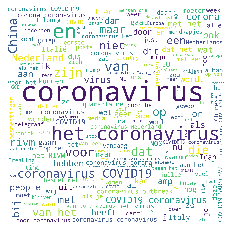

In [130]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_extraction import stop_words

stopwords = list(stop_words.ENGLISH_STOP_WORDS)
stopwords.extend(["https", "http", "nhttps", "and", "the", "for", "to", "that"])

# # str = ' '
# # str.join(hashtags_flatten)
wordcloud = WordCloud(background_color="white",width=2000, height=2000, stopwords = stopwords, margin=2,normalize_plurals=False).generate((" ").join(location_tweets))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file('wordcloud_nl.png')


In [116]:
# pip install matplotlib

In [131]:
import pickle 

filepath = "corona_twitter_data.pickle"
with open(filepath, "wb") as f:
    pickle.dump(words, f)

In [132]:
with open(filepath, "rb") as f:
    words = pickle.load(f)
print(words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [133]:
from prettytable import PrettyTable
for label, data in (('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:1000] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt) 

+-----------------------+-------+
| Word                  | Count |
+-----------------------+-------+
| the                   | 34283 |
| #coronavirus          | 28508 |
| to                    | 22638 |
| in                    | 20277 |
| of                    | 17845 |
| is                    | 14212 |
| and                   | 12901 |
| a                     | 11970 |
| for                   |  8430 |
| on                    |  6987 |
| #Coronavirus          |  6882 |
| het                   |  6528 |
| de                    |  6232 |
| are                   |  5571 |
| #COVID19              |  5181 |
| from                  |  5001 |
| with                  |  4916 |
| that                  |  4747 |
| The                   |  4240 |
| be                    |  4036 |
| have                  |  4017 |
| this                  |  3964 |
| van                   |  3756 |
| as                    |  3568 |
| en                    |  3544 |
| you                   |  3535 |
| I           

TypeError: unhashable type: 'list'